In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from collections import Counter 
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, f1_score, accuracy_score, mean_squared_error, classification_report

In [2]:
data = pd.read_csv('H:\DATA\MY\practice\Practice-24\weatherAUS.csv')
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
data.shape

print(Counter(data['RainTomorrow']))

Counter({'No': 110316, 'Yes': 31877, nan: 3267})


In [4]:
print(data.isnull().sum())

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64


In [5]:
print(Counter(data['Location']))
print(data['Location'].nunique())

Counter({'Canberra': 3436, 'Sydney': 3344, 'Melbourne': 3193, 'Brisbane': 3193, 'Adelaide': 3193, 'Perth': 3193, 'Hobart': 3193, 'Darwin': 3193, 'Albury': 3040, 'Wollongong': 3040, 'MountGinini': 3040, 'Ballarat': 3040, 'Bendigo': 3040, 'Cairns': 3040, 'GoldCoast': 3040, 'Townsville': 3040, 'MountGambier': 3040, 'Albany': 3040, 'Launceston': 3040, 'AliceSprings': 3040, 'Newcastle': 3039, 'Penrith': 3039, 'Tuggeranong': 3039, 'BadgerysCreek': 3009, 'Cobar': 3009, 'CoffsHarbour': 3009, 'Moree': 3009, 'NorfolkIsland': 3009, 'Richmond': 3009, 'SydneyAirport': 3009, 'WaggaWagga': 3009, 'Williamtown': 3009, 'Sale': 3009, 'MelbourneAirport': 3009, 'Mildura': 3009, 'Portland': 3009, 'Watsonia': 3009, 'Dartmoor': 3009, 'Nuriootpa': 3009, 'Woomera': 3009, 'Witchcliffe': 3009, 'PearceRAAF': 3009, 'PerthAirport': 3009, 'Walpole': 3006, 'NorahHead': 3004, 'SalmonGums': 3001, 'Nhil': 1578, 'Katherine': 1578, 'Uluru': 1578})
49


In [6]:
features = ['Temp9am','Temp3pm','RainTomorrow','Humidity3pm','Humidity9am','WindSpeed3pm','WindSpeed9am',
            'WindDir3pm','WindDir9am','WindGustSpeed','WindGustDir','Rainfall','MaxTemp','MinTemp']

for feature in features:
  if data[feature].dtype != object:
    data[feature] = data[feature].fillna(data[feature].mean())

In [7]:
print(data.isnull().sum())


Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed        0
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am              0
Temp3pm              0
RainToday         3261
RainTomorrow      3267
dtype: int64


In [8]:
data['WindGustDir'].mode()
Counter(data['WindGustDir'])

Counter({nan: 10326,
         'W': 9915,
         'SE': 9418,
         'N': 9313,
         'SSE': 9216,
         'E': 9181,
         'S': 9168,
         'WSW': 9069,
         'SW': 8967,
         'SSW': 8736,
         'WNW': 8252,
         'NW': 8122,
         'ENE': 8104,
         'ESE': 7372,
         'NE': 7133,
         'NNW': 6620,
         'NNE': 6548})

In [9]:
data = data.dropna(subset= 'WindGustDir')
print(data.isnull().sum())
data.head()
data.shape

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation      57516
Sunshine         64047
WindGustDir          0
WindGustSpeed        0
WindDir9am        7615
WindDir3pm         970
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am      10780
Pressure3pm      10739
Cloud9am         53582
Cloud3pm         55642
Temp9am              0
Temp3pm              0
RainToday         2660
RainTomorrow      2271
dtype: int64


(135134, 23)

In [10]:
features = ['RainToday','RainTomorrow','WindDir9am','WindDir3pm']

for feature in features:
  if feature == 'RainTomorrow':
    data.loc[:, feature] = data[feature].fillna('Yes')
  if data[feature].dtype == object:
    data.loc[:, feature] = data[feature].fillna(data[feature].mode()[0])
    
print(data.isnull().sum())


Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation      57516
Sunshine         64047
WindGustDir          0
WindGustSpeed        0
WindDir9am           0
WindDir3pm           0
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am      10780
Pressure3pm      10739
Cloud9am         53582
Cloud3pm         55642
Temp9am              0
Temp3pm              0
RainToday            0
RainTomorrow         0
dtype: int64


C:\Users\mouncef\AppData\Local\Temp\ipykernel_12880\2560409516.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


<Axes: >

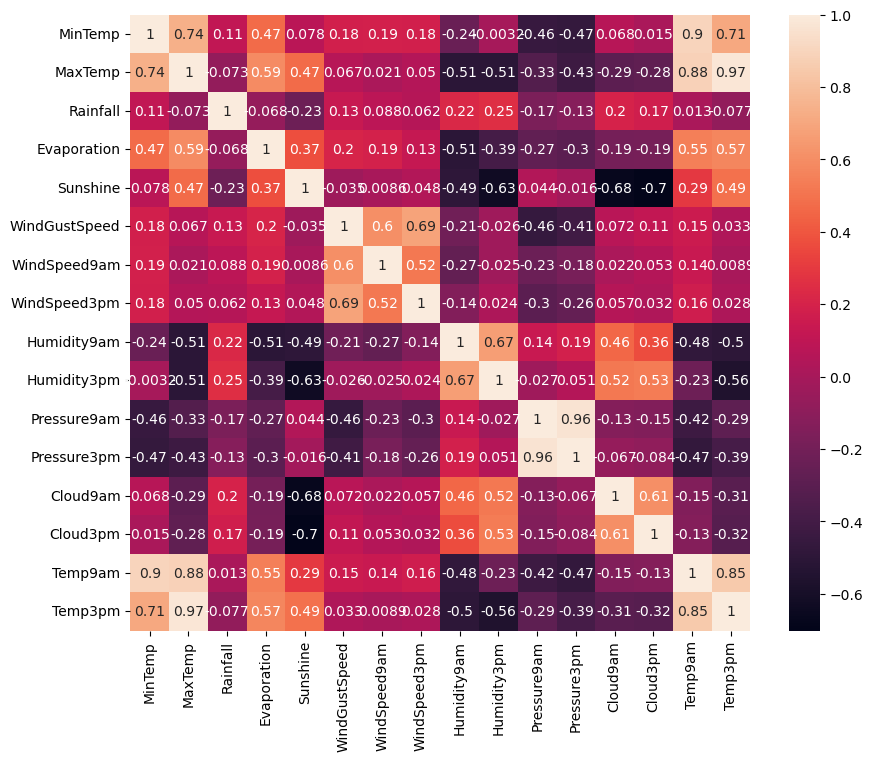

In [11]:
corr_matrix = data.select_dtypes(include=['number']).corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True)

In [12]:
data = data.drop(columns=['Sunshine','Evaporation','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Date'])

In [13]:
print(data.isnull().sum())
data.shape

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64


(135134, 16)

In [14]:
from category_encoders import TargetEncoder

X = data.drop('RainTomorrow',axis = 1)
Y = data['RainTomorrow']

label_encoder = LabelEncoder()

# Encode target variable
Y = label_encoder.fit_transform(Y)


In [15]:
categorical_columns = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

# Initialize TargetEncoder
encoder = TargetEncoder(cols=categorical_columns)

X_encoded = encoder.fit_transform(X, Y)

In [16]:
# the data is ready to go 
# we are trying to predict the weather tomorrow , weather it's going to rain or not


x_train, x_test, y_train, y_test = train_test_split(X_encoded, Y, test_size= 0.2, random_state= 42)
model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

accuracy = accuracy_score(y_pred, y_test)
repport = classification_report(y_pred, y_test)

print('the accuracy score the random forest model : ',accuracy)
print('the classification report : ',repport)


the accuracy score the random forest model :  0.84996484996485
the classification report :                precision    recall  f1-score   support

           0       0.95      0.87      0.91     22744
           1       0.52      0.77      0.62      4283

    accuracy                           0.85     27027
   macro avg       0.73      0.82      0.76     27027
weighted avg       0.88      0.85      0.86     27027



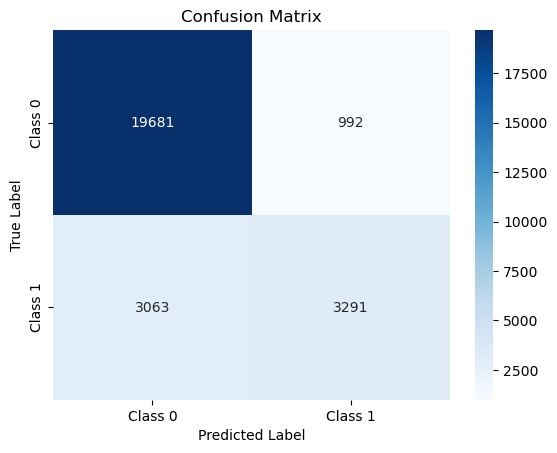

In [17]:
from sklearn.metrics import confusion_matrix


# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],  # Replace with your class names
            yticklabels=['Class 0', 'Class 1'])  # Replace with your class names

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [18]:
# we can the target variable has an imbalanced data 
# we need to re-perform the test with a balanced data 
# here we are using ensemble learning for class imbalanced , Xgboost can handle this type of issues
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix

model = xgb.XGBClassifier(scale_pos_weight=103453/31681)  # Example weight based on class imbalance ratio

model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[17259  3414]
 [ 1565  4789]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.83      0.87     20673
           1       0.58      0.75      0.66      6354

    accuracy                           0.82     27027
   macro avg       0.75      0.79      0.77     27027
weighted avg       0.84      0.82      0.82     27027



In [19]:
# we can see that 58% of the class 1 is correctly classified , this is not a good sign
# we will apply over and under sampling technics , we will use 50k for class 0 and 50k for class 1 
# so we need to over sample the class 1 and under sample the class 0

from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.combine import SMOTEENN,SMOTETomek
from imblearn.pipeline import Pipeline

X_train, X_test, Y_train, Y_test = train_test_split(X_encoded, Y, test_size=0.2, random_state=42)

tomek = SMOTETomek(random_state=42)
X_train_resampled, Y_train_resampled = tomek.fit_resample(X_train, Y_train)

# Train the model with the resampled data
model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, Y_train_resampled)

# Predict on the test set
Y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))

print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))


Confusion Matrix:
[[19042  1631]
 [ 2566  3788]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     20673
           1       0.70      0.60      0.64      6354

    accuracy                           0.84     27027
   macro avg       0.79      0.76      0.77     27027
weighted avg       0.84      0.84      0.84     27027



In [20]:
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE

X_train, X_test, Y_train, Y_test = train_test_split(X_encoded, Y, test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

model = RandomForestClassifier(kernel='rbf')
model.fit(X_train_resampled, Y_train_resampled)
Y_pred = model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))

print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))


TypeError: RandomForestClassifier.__init__() got an unexpected keyword argument 'kernel'